# AMERICAN SIGN LANGUAGE USING MEDIAPIPE AND SCIKIT LEARN

Downloading the Dataset From Kaggle using Kaggle API

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = kaggleapi_path

In [ ]:
!pip install -q kaggle

In [ ]:
!chmod 600 kaggleapi_path/kaggle.json

In [ ]:
! kaggle datasets download danrasband/asl-alphabet-test

In [ ]:
!unzip asl-alphabet-test.zip

Import the Necessary Modules

In [1]:
import os
import pickle
import numpy as np
import pandas as pd
import mediapipe as mp
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, recall_score, precision_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [2]:
#path of the image directory
DATA_DIR = './images'

In [3]:
#mediapipe modules
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

In [4]:
hands = mp_hands.Hands(static_image_mode=True, min_detection_confidence=0.3)

### Create Landmarks for the images

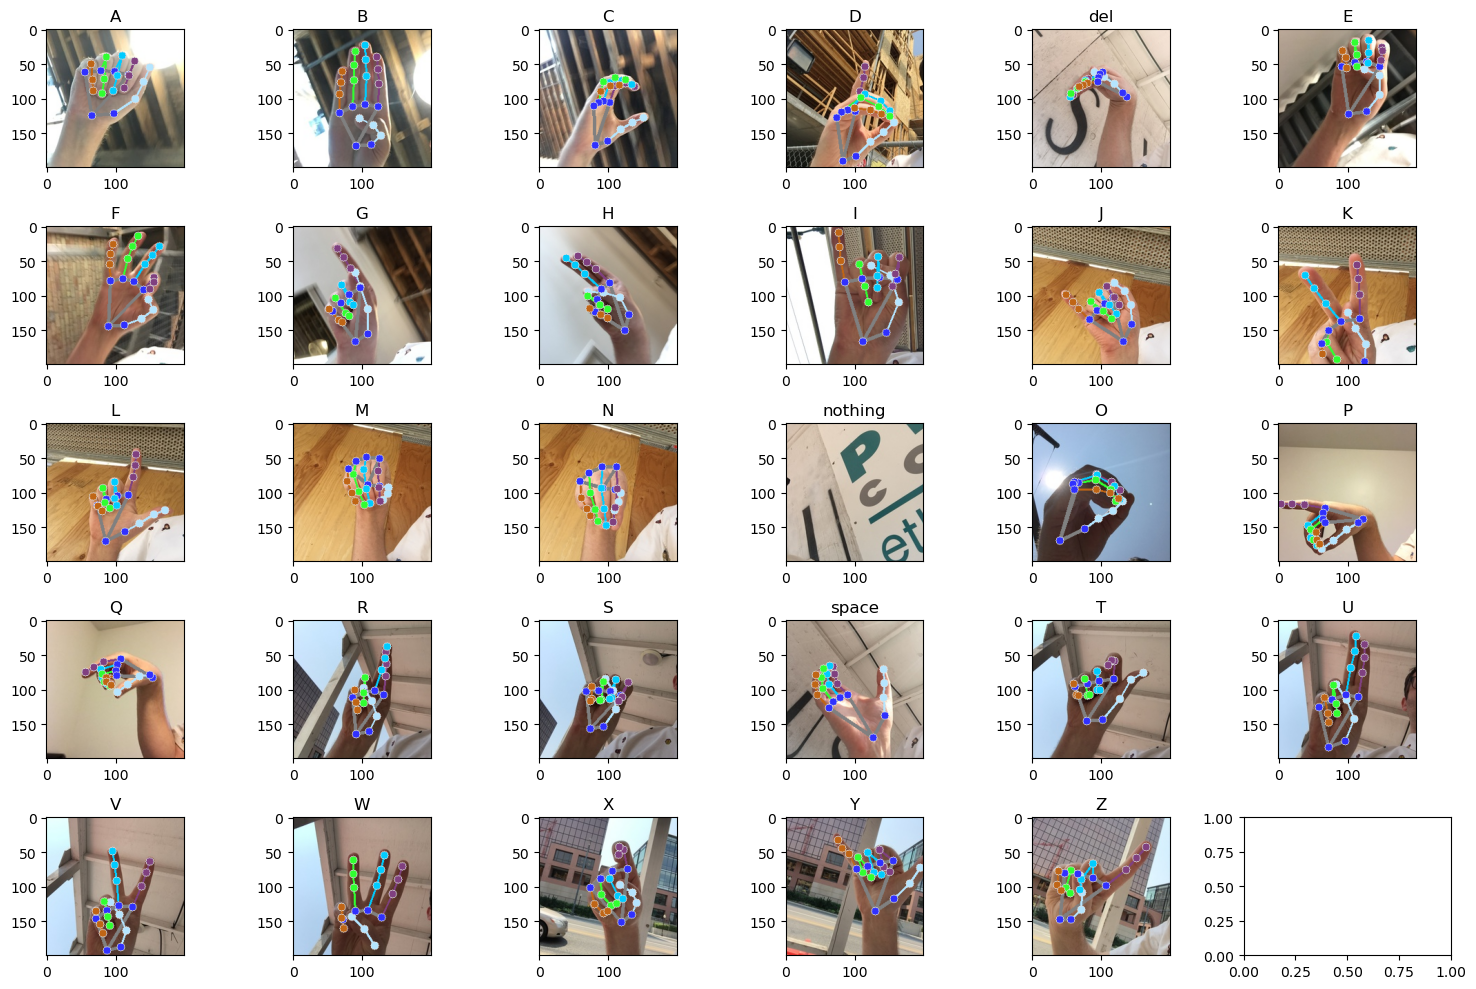

In [5]:
# Create subplots with 5 rows and 6 columns
num_rows = 5
num_cols = 6

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

# Get a list of subdirectories (A to Z)
subdirectories = [os.path.join(DATA_DIR, folder) for folder in os.listdir(DATA_DIR)]

for i, dir_ in enumerate(subdirectories):
    # Get the first image in each subdirectory
    img_files = [file for file in os.listdir(dir_) if file.endswith('.jpg')]
    if img_files:
        img_file = os.path.join(dir_, img_files[0])
        
        img = cv2.imread(img_file)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        result = hands.process(img_rgb)
        if result.multi_hand_landmarks:
            for hand_landmarks in result.multi_hand_landmarks:
                mp_drawing.draw_landmarks(
                    img_rgb,
                    hand_landmarks,
                    mp_hands.HAND_CONNECTIONS,
                    mp_drawing_styles.get_default_hand_landmarks_style(),
                    mp_drawing_styles.get_default_hand_connections_style()
                )

        # Calculate the row and column for the current subplot
        row = i // num_cols
        col = i % num_cols

        ax = axes[row, col]
        ax.imshow(img_rgb)
        ax.set_title(os.path.basename(dir_))

plt.tight_layout()  # Ensures proper spacing between subplots
plt.show()


### Creating a Dataset to write the Landmark points 

In [7]:
#path of the csv file to be saved
output_csv = 'E:/dsc-works/ASL/dataset.csv'

In [8]:
# Open the CSV file for writing
file_name = open(output_csv, 'a')

# Loop through the folders and files in the image directory
for each_folder in os.listdir(DATA_DIR):
    if '._' in each_folder:
        pass
    else:
        for each_number in os.listdir(DATA_DIR + '/' + each_folder):
            if '._' in each_number:
                pass
            
            else:
                label = each_folder
                file_loc = DATA_DIR + '/' + each_folder + '/' + each_number

                # Read the static image
                hand_img = cv2.imread(file_loc)

                # Image processing
                # 1. Convert BGR to RGB
                img_rgb = cv2.cvtColor(hand_img, cv2.COLOR_BGR2RGB)

                # 2. Flip the img in Y-axis
                img_flip = cv2.flip(img_rgb, 1)

                # Accessing MediaPipe solutions
                mp_hands = mp.solutions.hands

                # Initialize Hands
                hands = mp_hands.Hands(static_image_mode=True,
                                       max_num_hands=1, min_detection_confidence=0.7)

                # Results
                output = hands.process(img_flip)

                hands.close()

                try:
                    data = output.multi_hand_landmarks[0]
                    print(data)

                    data = str(data)

                    data = data.strip().split('\n')

                    garbage = ['landmark {', '  visibility: 0.0', '  presence: 0.0', '}']

                    without_garbage = []

                    for i in data:
                        if i not in garbage:
                            without_garbage.append(i)

                    clean = []

                    for i in without_garbage:
                        i = i.strip()
                        clean.append(i[2:])

                    for i in range(0, len(clean)):
                        clean[i] = float(clean[i])

                    for id, i in enumerate(clean):
                        if id == 0:
                            print(i)

                        file_name.write(str(i))
                        file_name.write(',')

                    file_name.write(label)
                    file_name.write('\n')

                except:
                    file_name.write('0')
                    file_name.write(',')

                    file_name.write('None')
                    file_name.write('\n')

# Close the CSV file
file_name.close()
print('Data Created !!!')


landmark {
  x: 0.6668252
  y: 0.62903464
  z: -1.8092383e-06
}
landmark {
  x: 0.5025208
  y: 0.62313604
  z: -0.046830155
}
landmark {
  x: 0.35684127
  y: 0.49841213
  z: -0.065227084
}
landmark {
  x: 0.29580545
  y: 0.3707767
  z: -0.08814149
}
landmark {
  x: 0.25906152
  y: 0.27592045
  z: -0.10195103
}
landmark {
  x: 0.3992131
  y: 0.33059388
  z: -0.0017357054
}
landmark {
  x: 0.3569347
  y: 0.22970417
  z: -0.086254366
}
landmark {
  x: 0.40128374
  y: 0.34083328
  z: -0.13826415
}
landmark {
  x: 0.44204968
  y: 0.4397645
  z: -0.15776934
}
landmark {
  x: 0.49803722
  y: 0.30516583
  z: -0.013189337
}
landmark {
  x: 0.44639847
  y: 0.19803844
  z: -0.1084334
}
landmark {
  x: 0.4901607
  y: 0.34732303
  z: -0.13724941
}
landmark {
  x: 0.53202295
  y: 0.46485013
  z: -0.12807217
}
landmark {
  x: 0.6008434
  y: 0.29750133
  z: -0.038218673
}
landmark {
  x: 0.5554599
  y: 0.20392068
  z: -0.13313852
}
landmark {
  x: 0.5802054
  y: 0.35920635
  z: -0.11750198
}
landmark 

In [18]:
#reading the csv files via pandas
df = pd.read_csv('./dataset.csv')
df.columns = [i for i in range(df.shape[1])]
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.548707,0.552130,-1.591988e-06,0.393964,0.558086,-0.041245,0.250028,0.413660,-0.042841,0.195094,...,0.549755,0.190916,-0.117675,0.549217,0.303905,-0.100709,0.555338,0.382964,-0.068027,A
1,0.559872,0.585791,-1.755085e-06,0.393036,0.581377,-0.054266,0.245863,0.452110,-0.075003,0.178201,...,0.549992,0.203539,-0.138950,0.549764,0.319181,-0.122915,0.552859,0.409240,-0.089118,A
2,0.557276,0.567014,-1.803299e-06,0.384134,0.548212,-0.053060,0.236265,0.408539,-0.073603,0.166931,...,0.551888,0.169377,-0.141069,0.545961,0.288034,-0.119728,0.551069,0.378220,-0.081530,A
3,0.624476,0.607044,-2.027465e-06,0.473990,0.621034,-0.056877,0.325056,0.476746,-0.073142,0.262934,...,0.645289,0.242619,-0.143186,0.639674,0.365555,-0.123822,0.637230,0.450552,-0.090702,A
4,0.509379,0.573357,-1.379893e-06,0.359441,0.521781,-0.040420,0.258570,0.396496,-0.056789,0.214789,...,0.551611,0.245001,-0.098878,0.536675,0.338041,-0.083016,0.531047,0.410396,-0.053908,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
864,0.610646,0.730336,-2.464293e-07,0.521878,0.734897,-0.026792,0.425672,0.665654,-0.038738,0.400266,...,0.535046,0.502474,-0.106136,0.548331,0.577007,-0.083748,0.562393,0.602616,-0.057126,Z
865,0.657927,0.757325,-2.919506e-07,0.568067,0.768787,-0.028182,0.461294,0.702002,-0.045329,0.442008,...,0.580771,0.533840,-0.106329,0.593438,0.609025,-0.083205,0.614582,0.624634,-0.056777,Z
866,0.676783,0.806071,-8.422848e-07,0.549203,0.813307,-0.064415,0.394143,0.745785,-0.106105,0.363481,...,0.572321,0.490605,-0.177940,0.586883,0.599777,-0.148057,0.609474,0.606446,-0.112752,Z
867,0.857998,0.751147,-5.815583e-07,0.746781,0.771629,-0.071092,0.610225,0.688494,-0.110949,0.592773,...,0.788002,0.458219,-0.170145,0.794958,0.559859,-0.145507,0.805604,0.565006,-0.114810,Z


In [19]:
#renaming the output file to alphabet
df = df.rename(columns={63: 'Alphabet'})
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,Alphabet
0,0.548707,0.552130,-1.591988e-06,0.393964,0.558086,-0.041245,0.250028,0.413660,-0.042841,0.195094,...,0.549755,0.190916,-0.117675,0.549217,0.303905,-0.100709,0.555338,0.382964,-0.068027,A
1,0.559872,0.585791,-1.755085e-06,0.393036,0.581377,-0.054266,0.245863,0.452110,-0.075003,0.178201,...,0.549992,0.203539,-0.138950,0.549764,0.319181,-0.122915,0.552859,0.409240,-0.089118,A
2,0.557276,0.567014,-1.803299e-06,0.384134,0.548212,-0.053060,0.236265,0.408539,-0.073603,0.166931,...,0.551888,0.169377,-0.141069,0.545961,0.288034,-0.119728,0.551069,0.378220,-0.081530,A
3,0.624476,0.607044,-2.027465e-06,0.473990,0.621034,-0.056877,0.325056,0.476746,-0.073142,0.262934,...,0.645289,0.242619,-0.143186,0.639674,0.365555,-0.123822,0.637230,0.450552,-0.090702,A
4,0.509379,0.573357,-1.379893e-06,0.359441,0.521781,-0.040420,0.258570,0.396496,-0.056789,0.214789,...,0.551611,0.245001,-0.098878,0.536675,0.338041,-0.083016,0.531047,0.410396,-0.053908,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
864,0.610646,0.730336,-2.464293e-07,0.521878,0.734897,-0.026792,0.425672,0.665654,-0.038738,0.400266,...,0.535046,0.502474,-0.106136,0.548331,0.577007,-0.083748,0.562393,0.602616,-0.057126,Z
865,0.657927,0.757325,-2.919506e-07,0.568067,0.768787,-0.028182,0.461294,0.702002,-0.045329,0.442008,...,0.580771,0.533840,-0.106329,0.593438,0.609025,-0.083205,0.614582,0.624634,-0.056777,Z
866,0.676783,0.806071,-8.422848e-07,0.549203,0.813307,-0.064415,0.394143,0.745785,-0.106105,0.363481,...,0.572321,0.490605,-0.177940,0.586883,0.599777,-0.148057,0.609474,0.606446,-0.112752,Z
867,0.857998,0.751147,-5.815583e-07,0.746781,0.771629,-0.071092,0.610225,0.688494,-0.110949,0.592773,...,0.788002,0.458219,-0.170145,0.794958,0.559859,-0.145507,0.805604,0.565006,-0.114810,Z


In [20]:
X = df.iloc[:, :-1]
print("Features shape =", X.shape)

Y = df.iloc[:, -1]
print("Labels shape =", Y.shape)

Features shape = (869, 63)
Labels shape = (869,)


### Training the Model

In [21]:
#splitting the training and testing data and training the model
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
svm = SVC(C=10, gamma=0.1, kernel='rbf')
svm.fit(x_train, y_train)

SVC(C=10, gamma=0.1)

In [22]:
#to check the acuracy of the trained svc model
y_pred = svm.predict(x_test)
acuracy = accuracy_score(y_pred, y_test)
print('accuracy_score =', acuracy,'%')

accuracy_score = 0.8218390804597702 %


In [23]:
#for confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
precision = precision_score(y_test, y_pred, average='micro')

In [24]:
f1, recall, precision

(0.8218390804597702, 0.8218390804597702, 0.8218390804597702)

<Axes: title={'center': 'Confusion Matrix - American Sign Language'}>

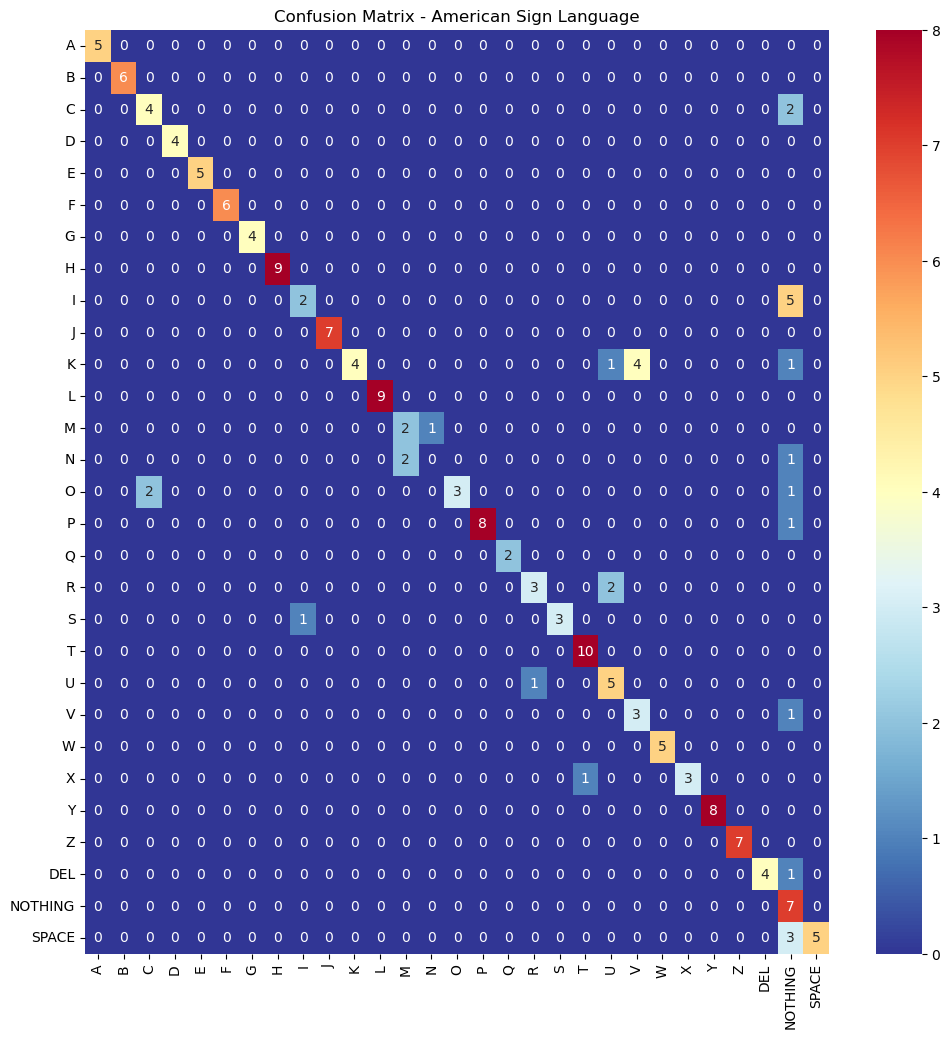

In [35]:
#plotting the confusion matrix 
labels = sorted(list(set(df['Alphabet'])))
labels = [x.upper() for x in labels]

fig, ax = plt.subplots(figsize=(12, 12))

ax.set_title("Confusion Matrix - American Sign Language")

maping = sns.heatmap(cf_matrix, 
                     annot=True,
                     linewidths=0,
                     cmap='RdYlBu_r',
                     xticklabels=labels,
                     yticklabels=labels, vmax=8,
                     fmt='g',
                     ax=ax
                    )
maping

In [36]:
# save model
with open('asl_model.pkl','wb') as f:
    pickle.dump(svm,f)